# Predicting Wins at the Highest Level in the NBA

### By Bhavesh Kemburu

The NBA Finals represent the biggest stage in basketball, for two teams from each conference pursuing the ultimate prize. Winning the ship often results in lucrative contracts during the offseason, statues built(literally) outside the stadium, and the support of many fanbases. Some series have been heavily one-sided while others have been extremely close, and often pivoted in the opposite direction due to a series of events. I want to see if stats tell the story of how teams won each game during the NBA Finals game. I want to analyze different stats by each NBA team during the Finals, outside of points made, to see if I can predict the winners of each NBA Finals, and furthermore analyze which areas appear to be the most pivotal towards winning individual games at the highest stage. This dataset starts after 1980 as this is when the NBA added the three point line.

If you are unfamiliar with basketball terminology, this [stats](https://basketball.epicsports.com/basketball-glossary.html) link is very helpful.

# Data Collection

The dataset can be found in this [Kaggle](https://www.kaggle.com/daverosenman/nba-finals-team-stats) link. According to the description it has been scraped from [Basketball Reference](https://www.basketball-reference.com/) I recommend taking a look at Basketball Reference for more insight into how basketball data is organized and collected. 

## Loading the Data 

The two CSV files we are extracting data from are identical and structure, but one corresponds to the data of the winners of each series, while others correspond to the losers. It is important to note that each series is a best of seven, meaning that one team does not have to win all the games to win an entire series. We will look both at individual game stats as well as averages over series.

In [82]:
import pandas as pd
df = pd.read_csv("championsdata.csv")
runnerup_df = pd.read_csv("runnerupsdata.csv")
df.head(10)

,Year,Team,Game,Win,Home,MP,FG,FGA,FGP,TP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1980,Lakers,1,1,1,240,48,89,0.539,0,...,0.867,12,31,43,30,5,9,17,24,109
1,1980,Lakers,2,0,1,240,48,95,0.505,0,...,0.667,15,37,52,32,12,7,26,27,104
2,1980,Lakers,3,1,0,240,44,92,0.478,0,...,0.767,22,34,56,20,5,5,20,25,111
3,1980,Lakers,4,0,0,240,44,93,0.473,0,...,0.737,18,31,49,23,12,6,19,22,102
4,1980,Lakers,5,1,1,240,41,91,0.451,0,...,0.788,19,37,56,28,7,6,21,27,108
5,1980,Lakers,6,1,0,240,45,92,0.489,0,...,0.943,17,35,52,27,14,4,17,22,123
6,1981,Celtics,1,1,1,240,41,95,0.432,0,...,0.800,25,29,54,23,6,5,19,21,98
7,1981,Celtics,2,0,1,240,41,82,0.500,0,...,0.615,14,34,48,17,6,7,22,27,90
8,1981,Celtics,3,1,0,240,40,89,0.449,2,...,0.632,16,28,44,24,12,6,11,25,94
9,1981,Celtics,4,0,0,240,35,74,0.473,0,...,0.667,17,30,47,22,5,6,22,22,86


In [83]:
#Runner Ups
runnerup_df.head(10)

,Year,Team,Game,Win,Home,MP,FG,FGA,FGP,TP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1980,Sixers,1,0,0,240,40,90,0.444,0,...,0.786,14,26,40,28,12,13,14,17,102
1,1980,Sixers,2,1,0,240,43,85,0.506,0,...,0.778,5,29,34,34,14,11,20,21,107
2,1980,Sixers,3,0,1,240,45,93,0.484,1,...,0.588,13,24,37,34,12,8,13,25,101
3,1980,Sixers,4,1,1,240,41,79,0.519,0,...,0.885,5,29,34,31,5,10,14,20,105
4,1980,Sixers,5,0,0,240,42,94,0.447,0,...,0.792,13,29,42,32,9,7,12,25,103
5,1980,Sixers,6,0,1,240,47,89,0.528,0,...,0.591,7,29,36,27,4,11,18,27,107
6,1981,Rockets,1,0,0,240,42,99,0.424,0,...,0.786,19,23,42,23,15,3,10,20,95
7,1981,Rockets,2,1,0,240,34,85,0.400,2,...,0.688,13,22,35,16,6,8,9,17,92
8,1981,Rockets,3,0,1,240,24,79,0.304,0,...,0.742,19,29,48,10,6,10,21,19,71
9,1981,Rockets,4,1,1,240,37,103,0.359,1,...,0.727,28,21,49,22,8,2,10,20,91


## Removing Irrelevant Statistics

Fortunately, the data has been scraped thoroughly so there is not much preprocessing we need to conduct. In determining whether a team will win a particular game or series, I have chosen to remove certain statistics, because they are either irrelevant or are too obvious in terms of predicting which team would win. Here are the following statistics I have chosen to remove:

Game - Game #. Given that we have year, the game number won't be useful in grouping each series. 

MP - Total minutes played. This is the same for both teams in a game.

FG - Field Goals Made. This and TP will easily allow for calculations for points made.

FGA - Field Goals Attempted. We will use percentage instead.

TP - Three Pointers Made. Same reason as FG.

TPA - Three Pointers Attempted. Same reason as FGA.

FT - Free Throws Made. Same reason as FG.

FTA - Free Throws Attempted. Same reason as FGA.

PTS - Points scored. Obviously, whoever scores more points wins the game. We will keep it for now for further data analysis.


In [84]:
df.drop(['Game', 'MP', 'FG', 'FGA', 'TP', 'TPA', 'FT', 'FTA'], axis = 1, inplace = True)
runnerup_df.drop(['Game', 'MP', 'FG', 'FGA', 'TP', 'TPA', 'FT', 'FTA'], axis = 1, inplace = True)
#Replace null values with zeros
df = df.fillna(0)
runnerup_df = runnerup_df.fillna(0)
df

,Year,Team,Win,Home,FGP,TPP,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1980,Lakers,1,1,0.539,0.000,0.867,12,31,43,30,5,9,17,24,109
1,1980,Lakers,0,1,0.505,0.000,0.667,15,37,52,32,12,7,26,27,104
2,1980,Lakers,1,0,0.478,0.000,0.767,22,34,56,20,5,5,20,25,111
3,1980,Lakers,0,0,0.473,0.000,0.737,18,31,49,23,12,6,19,22,102
4,1980,Lakers,1,1,0.451,0.000,0.788,19,37,56,28,7,6,21,27,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,2017,Warriors,1,1,0.511,0.368,0.821,13,29,42,27,8,2,13,24,129
216,2018,Warriors,1,1,0.511,0.361,0.950,4,34,38,31,10,6,7,18,124
217,2018,Warriors,1,1,0.573,0.417,0.619,7,34,41,28,3,8,12,25,122
218,2018,Warriors,1,0,0.519,0.346,0.895,6,31,37,27,6,5,10,20,110


## Analyzing Individual Stats

Through my anecdotal experience watching NBA games, I just wanted to make predictions on certain statistics and their impact on winning games:

Home - Home/Away Team --> Home team is usually favored to win a game, so we'll give the nod in terms of scoring to here.

ORB - Offensive rebounds --> Let's say fewer offensive rebounds, since they'll miss fewer shots overall.

DRB - Defensive rebounds --> Let's say more defensive rebounds for this team, they are boxing out after the opposing team misses

TRB - Total rebounds --> More rebounds overall, since defensive rebounds are more common than offensive.

AST - Assists --> I'm a firm believer in that team basketball wins championships. However, I also know that star players dominate the game. Certain teams like the Warriors are more assist heavy.

STL - Steals --> Defense wins championships too, so I'll go for more steals which lead to fastbreak points. However, this could also tie into assists/turnovers, so more research needed here.

BLK - Blocks --> I'll side with team with more blocks.

TOV - Turnovers --> More assists will lead to more turnovers. Perhaps assist/turnover ratio could help.

PF - Personal fouls --> Also difficult to analyze, generally more fouls lead to more free throws which slows down game pace. However, fouls can often be due to tighter defense, end of game situations(fouling rather than giving up a shot), and other factors. I think only large differences in fouls makes an impact, and even then not very sizeable.

TPP - three point percentage --> This could vary widely per era, so I would say that higher three point percentage is preferred especially in later eras.

FGP - field goal percentage. --> Higher field goal percentage wins.

FTP - free throw percentage. --> Normally higher free throw percentage is better.

## Data Processing and Analysis

Let's plot relationships for winning teams and their individual statistics over the years, as well as differentials between the winning and losing teams of each series. 

### Winning Team in a Series Statistics Over Time 

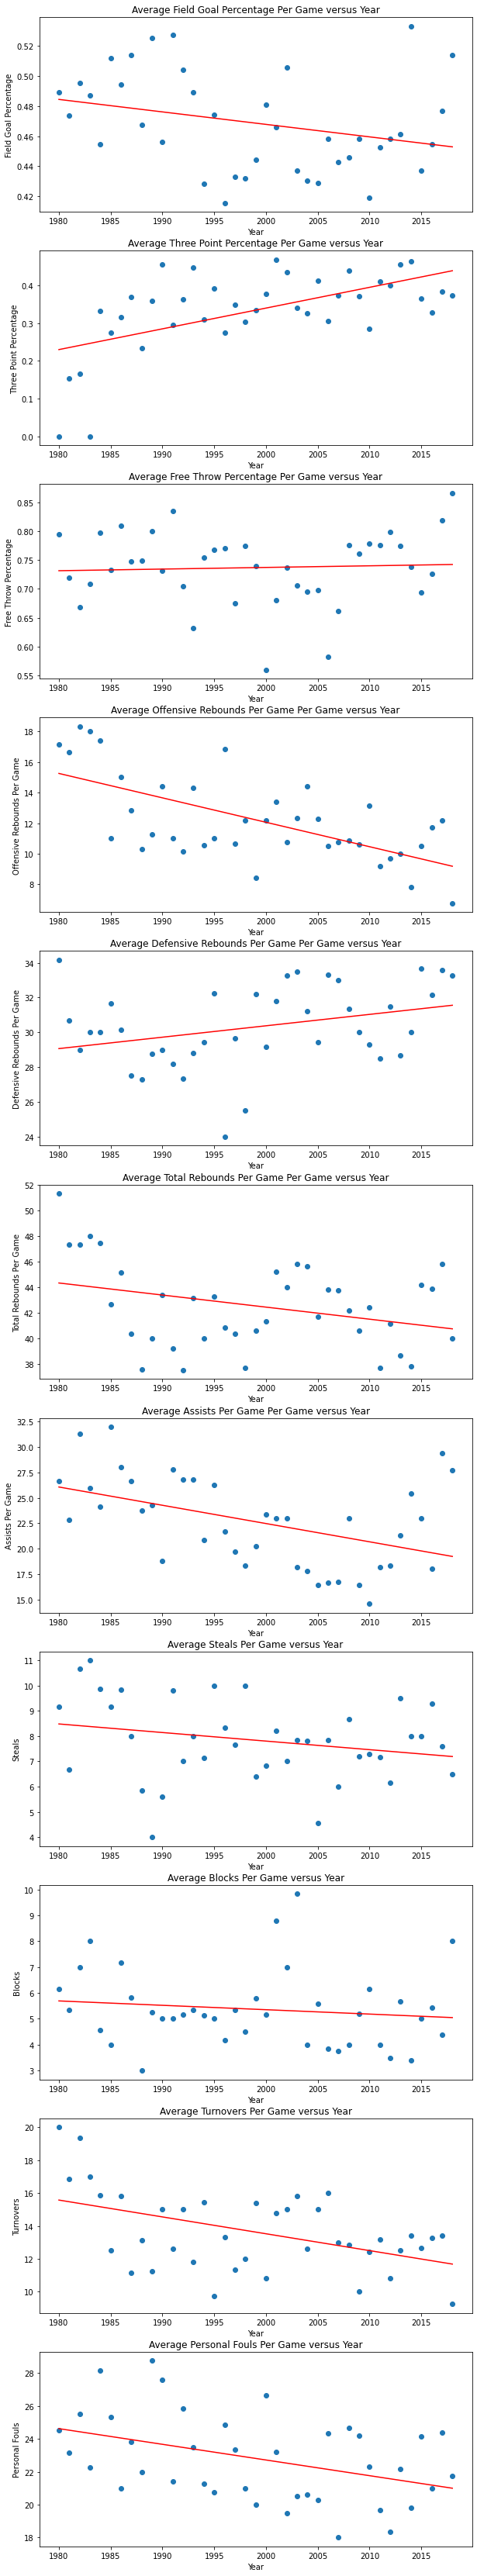

In [85]:
#importing relevant libraries
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#creating subplots and relevant columns/labels
fig, axes = plt.subplots(ncols = 1, nrows = 11, squeeze = False, figsize = (10, 60))
cols = ['FGP', 'TPP', 'FTP', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']
y_labels = ['Field Goal Percentage', 'Three Point Percentage', 'Free Throw Percentage', 'Offensive Rebounds Per Game', 'Defensive Rebounds Per Game', 'Total Rebounds Per Game', 'Assists Per Game', 'Steals', 'Blocks', 'Turnovers', 'Personal Fouls']
years = [x for x in range(1980, 2019)]
k = 0

#make subplot for each column
for column in df.columns:
    if k == len(cols): break
    stat_results = []
    #grab each stat info and add to stats
    for year in range(1980, 2019):
        stat = cols[k]
        year_stats = df[df["Year"] == year]
        stat_results.append(sum(year_stats[stat]) / len(year_stats[stat]))
    #make linear regressor model and fit to the scatter plot
    linear_regressor = LinearRegression()
    linear_regressor.fit(np.array(years).reshape(-1, 1), stat_results)
    y_pred = linear_regressor.predict(np.array(years).reshape(-1, 1)) 
    #add features to the plot itself
    axes[k, 0].scatter(years, stat_results)
    axes[k, 0].plot(years, y_pred, color = 'red')
    axes[k, 0].title.set_text("Average " + y_labels[k] + " Per Game versus Year")
    axes[k, 0].set_xlabel("Year")
    axes[k, 0].set_ylabel(y_labels[k])
    k += 1

Here are some of the trends observed from teams that won.

Field Goal Percentage - Overall field goal percentage shows a decreasing trend according to the regression plot.

Three Point Percentage - With some teams not attempting any threes at all over the course of a series, more threes. appear to be attempted over time and a higher field goal percentage occurs as a result.

Free Throw Percentage - Relatively static on average.

Average Offensive Rebounds - Has decreased on average over time.

Average Defensive Rebounds - Has slightly increased over time.

Average Total Rebounds - Has decreased on average over time, mostly due to the dropoff in offensive rebounds.

Average Assists Per Game - Has decreased(surprisingly) over time on average. Some interesting data points however, are the above average amounts in recent years, which was unsurprising. These [Twitter tweets about the Warriors](https://twitter.com/presidual/status/1135393056201428992?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweetembed%7Ctwterm%5E1135393056201428992%7Ctwgr%5E%7Ctwcon%5Es1_&ref_url=https%3A%2F%2Fftw.usatoday.com%2F2019%2F06%2Fnba-finals-warriors-stats-assists) summarizes why this team was so dominant for a stretch of years.

Average Steals Per Game - No clear trend here, a slight decrease on average.

Average Blocks Per Game - No clear trend here either. 

Average Turnovers Per Game - Slight decrease over time. Seems to correlate with a decrease in average assists.

Average Personal Fouls Per Game - Slight decrease on average over time. Might be due to a greater amount of three point attempts, meaning fewer drives overall into the paint as a percentage of total possessions.


### Differentials Per Series Average(Winning Versus Losing Team)

While the above data is interesting and could potentially be used to support theories on how the game of basketball has [evolved over time](https://www.horacegrant.com/blog/how-the-game-has-changed/). However, to better understand whether these stats helped teams win games, we will also need to take a look at how the losing team in a series performed. We can plot average differentials between winning and losing teams over the course of each series every year.

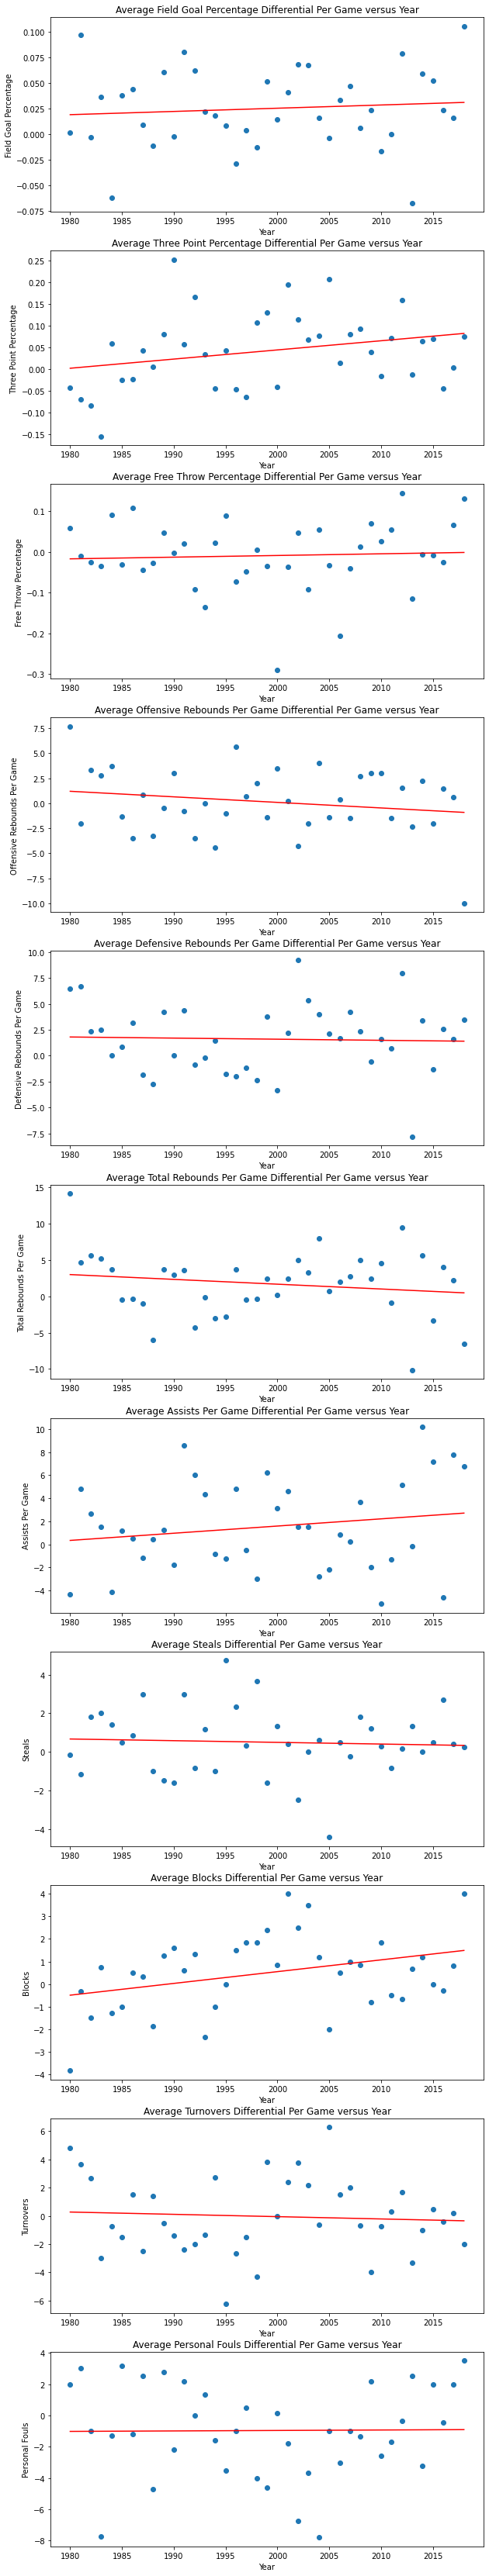

In [86]:
#plot relationships of various variables by year/champion
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols = 1, nrows = 11, squeeze = False, figsize = (10, 60))
cols = ['FGP', 'TPP', 'FTP', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']
y_labels = ['Field Goal Percentage', 'Three Point Percentage', 'Free Throw Percentage', 'Offensive Rebounds Per Game', 'Defensive Rebounds Per Game', 'Total Rebounds Per Game', 'Assists Per Game', 'Steals', 'Blocks', 'Turnovers', 'Personal Fouls']
years = [x for x in range(1980, 2019)]
k = 0
for column in df.columns:
    if k == len(cols): break
    stat_results = []
    for year in range(1980, 2019):
        stat = cols[k]
        winner_stats = df[df["Year"] == year]
        loser_stats = runnerup_df[runnerup_df["Year"] == year]
        stat_results.append((sum(winner_stats[stat]) - sum(loser_stats[stat])) / float(len(winner_stats[stat])))
    linear_regressor = LinearRegression()
    linear_regressor.fit(np.array(years).reshape(-1, 1), stat_results)
    y_pred = linear_regressor.predict(np.array(years).reshape(-1, 1))   
    axes[k, 0].scatter(years, stat_results)
    axes[k, 0].plot(years, y_pred, color = 'red')
    axes[k, 0].title.set_text("Average " + y_labels[k] + " Differential Per Game versus Year")
    axes[k, 0].set_xlabel("Year")
    axes[k, 0].set_ylabel(y_labels[k]) 
    
    k += 1

Looking at the differentials among different stats, many don't show any clear variation and are relatively close to zero. Ultimately I was wrong in my predictions for several stats as well such as assists being highly important, as well as free throw percentage. Thus, predicting winners of an NBA Finals series solely off of team stats does not seem helpful.

## Exploring Competitiveness of Series

Because many of these graphs don't show a high variability in stats between winning and losing teams of each series overall, I want to see how competitive each series were. Let's show the distribution of 4, 5, 6, and 7 game series during this period. My plots above are averages among each series, so it would make sense that during a series with more games the differentials will be lower. 

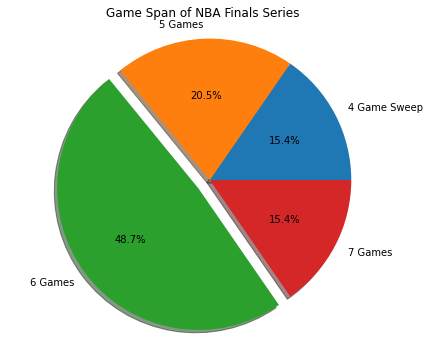

In [87]:
numOfEachSeries = [0, 0, 0, 0] #Number of Series of each game length
labels = ['4 Game Sweep', '5 Games', '6 Games', '7 Games']
for year in range(1980, 2019):
    lengthOfSeries = len(df[df["Year"] == year])
    numOfEachSeries[lengthOfSeries - 4] += 1 
explode = (0, 0, 0.1, 0)
fig, ax = plt.subplots(figsize = (7, 6))
ax.pie(numOfEachSeries, explode = explode, labels = labels, autopct='%1.1f%%', shadow = True)
ax.title.set_text("Game Span of NBA Finals Series")
ax.axis('equal')
plt.show() 

As you can see, the majority of series last 6 games, and as many sweeps exist as 7 game series. Since more series as a percentage are 6-7 games than 4-5 games, I do not believe that these statistics are enough to predict who wins an NBA series, as they are averaged over each series where each series could be skewed by one incredible performance in a single game. To verify, let's plot average point differential as well.

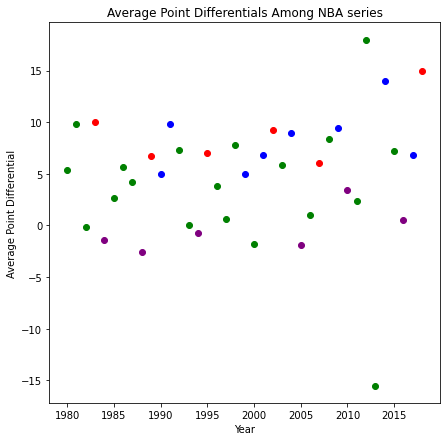

In [88]:
years = []
average_point_differential = []
#Label Reference - Red: 4 Games, Blue: 5 Games, Green: 6 Games, Purple: 7 Games
cdict = {4: 'red', 5: 'blue', 6: 'green', 7: 'purple'}
for year in range(1980, 2019):
    years.append(year)
    #extract data from each year and calculate point differential
    winner = df[df["Year"] == year]
    loser = runnerup_df[runnerup_df["Year"] == year]
    average_point_differential.append((sum(winner["PTS"]) - sum(loser["PTS"])) / float(len(winner)))

fig, ax = plt.subplots(figsize = (7, 7))
#add color to each individual point
for i in range(len(years)):
    length = len(df[df["Year"] == years[i]])
    ax.scatter(x = years[i], y = average_point_differential[i], c = cdict[length])
ax.title.set_text("Average Point Differentials Among NBA series")
ax.set_xlabel("Year")
ax.set_ylabel("Average Point Differential")
plt.show()

From the chart above, point differentials are on average about 5 points per game for the winning team. However, obviously for 6 and seven game series point differential averages are much lower, denoting a more competitive series compared to 4 and 5 game series. Thus, just using these statistics averaged over a series may not be enough to predict which team wins a series. However, using machine learning, we can try to predict individual game wins.

# Machine Learning

## Preparing Data

Because our data is in two different CSV files, we will need to combine them into one table for preparation. We will take the differences between each of the columns to represent our new dataset. We do not care about the individual teams since there is a column that already shows W/L predictions. Because the purpose is to compare the stats between the winning and losing team each feature column will represent a difference between two existing columns. 

In [89]:
#take differentials from each of the initial dataframes
#except year, home, and win amount
differential_df = pd.DataFrame(columns = ['Year', 'Home', 'FGP', 'TPP', 'FTP', 'ORB', 'DRB', 'AST', 'STL', 'TOV', 'PF'])
differential_df['Year'] = df['Year']
differential_df['Home'] = df['Home']
differential_df['FGP'] = df['FGP'] - runnerup_df['FGP']
differential_df['TPP'] = df['TPP'] - runnerup_df['TPP']
differential_df['FTP'] = df['FTP'] - runnerup_df['FTP']
differential_df['ORB'] = df['ORB'] - runnerup_df['ORB']
differential_df['DRB'] = df['DRB'] - runnerup_df['DRB']
differential_df['TRB'] = df['TRB'] - runnerup_df['TRB']
differential_df['AST'] = df['AST'] - runnerup_df['AST']
differential_df['STL'] = df['STL'] - runnerup_df['STL']
differential_df['BLK'] = df['BLK'] - runnerup_df['BLK']
differential_df['TOV'] = df['TOV'] - runnerup_df['TOV']
differential_df['PF'] = df['PF'] - runnerup_df['PF']
differential_df['Win'] = df['Win']
differential_df.head(10)

,Year,Home,FGP,TPP,FTP,ORB,DRB,AST,STL,TOV,PF,TRB,BLK,Win
0,1980,1,0.095,0.000,0.081,-2,5,2,-7,3,7,3,-4,1
1,1980,1,-0.001,0.000,-0.111,10,8,-2,-2,6,6,18,-4,0
2,1980,0,-0.006,-0.250,0.179,9,10,-14,-7,7,0,19,-3,1
3,1980,0,-0.046,0.000,-0.148,13,2,-8,7,5,2,15,-4,0
4,1980,1,0.004,0.000,-0.004,6,8,-4,-2,9,2,14,-1,1
5,1980,0,-0.039,0.000,0.352,10,6,0,10,-1,-5,16,-7,1
6,1981,1,0.008,0.000,0.014,6,6,0,-9,9,1,12,2,1
7,1981,1,0.100,-1.000,-0.073,1,12,1,0,13,10,13,-1,0
8,1981,0,0.145,0.667,-0.110,-3,-1,14,6,-10,6,-4,-4,1
9,1981,0,0.114,-0.333,-0.060,-11,9,0,-3,12,2,-2,4,0


## Decision Tree Classifier

We will employ a decision tree classifier using our various statistics. I recommend reading more about the decision tree classifier model [here](https://medium.com/swlh/decision-tree-classification-de64fc4d5aac)  I have chosen a decision tree classifier here because I am predicting whether a team wins or loses a game, a binary variable. We will need to create a new table first, that shows the differential between the winner and loser table. We will also split our data into training and testing data, with 90% of data as training and 10% as test. Since there could be variance in accuracy scores, I'll run 50 iterations of decision tree and take an average. 

In [124]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

feature_cols = ['FGP', 'TPP', 'FTP', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']
average_accuracy = 0
#perform 10 averages
for i in range(10):
    average_accuracy = 0
    #run 20 iterations of decision tree and take average accuracy
    for i in range(20):
        #perform random 90/10 train:test split
        X_train, X_test, y_train, y_test = train_test_split(differential_df.iloc[:, 1:13], differential_df.iloc[:, 13], test_size=0.1)

        dtree_classifier = DecisionTreeClassifier()
        dtree_classifier.fit(X_train, y_train)
        predictions = dtree_classifier.predict(X_test)
        average_accuracy += accuracy_score(y_test, predictions)
    print("Average Accuracy: ", str(average_accuracy / 20))

Average Accuracy:  0.8522727272727272
Average Accuracy:  0.8181818181818181
Average Accuracy:  0.8363636363636363
Average Accuracy:  0.8409090909090908
Average Accuracy:  0.8454545454545455
Average Accuracy:  0.8227272727272726
Average Accuracy:  0.8227272727272726
Average Accuracy:  0.8295454545454545
Average Accuracy:  0.8409090909090908
Average Accuracy:  0.831818181818182


I noticed a high variation in the accuracy scores when using Decision Tree, so I decided to perform averaging 10 times over 20 iterations of train/test/split. Analyzing these results, we can see that performing a 90/10 split results in high variance among the accuracies, ranging from 80-85%. From these accuracy results, there does not seem to be a clear trend in the way the classifier is predicting each time. 

# Conclusion

As a quick recap, we wanted to analyze trends in team statistics in games played during the NBA Finals. We first cleaned up our data by removing irrelevant columns for analysis. We then took a look at what the individual statistics might mean. We then plotted trends of winning teams in terms of each statistic, as well as differentials between winning and losing teams for each statistic. We also looked at how competitive series were in terms of 4, 5, 6, and 7 game series that may skew statistics in a certain way, and plotted point differentials and colored points differently based on series length. Finally, we incorporated machine learning to predict how well statistics could be used on their own to determine whether a team won a particular game.

From the high variance in the results and relatively small sample size of games(~220), I'd say statistics on their own are not enough to predict whether a team wins a particular game. I was incorrect in what I observed in certain trends among winning teams, such as assist differential making a high impact.

For further future analyses, we could analyze more advanced stats, such as offensive rating, and assist:turnover ratio, to see whether or not these more refined advanced stats could more accurately predict the outcome of games.

Hope you enjoyed reading this, and learned a thing or too about NBA stats!